In [18]:
# Import our libraries 

# Pandas and numpy for data wrangling
import pandas as pd
import numpy as np

# Seaborn / matplotlib for visualization 
import seaborn as sns
import matplotlib.pyplot as plt

# Import the trees from sklearn
from sklearn import tree

# Helper function to split our data
from sklearn.model_selection import train_test_split

# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score 

# Helper function for hyper-parameter turning.
from sklearn.model_selection import GridSearchCV

# Import our Decision Tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree, export_text

# Import our Random Forest 
from sklearn.ensemble import RandomForestClassifier

# Use inline so our visualizations display in notebook
%matplotlib inline

## Main Steps when building a Machine Learning Model. 
1. Inspect and explore data.
2. Select and engineer features.
3. Build and train model.
4. Evaluate model.

# #1 Inspect and explore data.
* Load titanic data
* Visualize all the data using sns.pairplot
* Check for null values

In [19]:
# Load in the titanic data set.
df = pd.read_csv('data/titanic.csv')


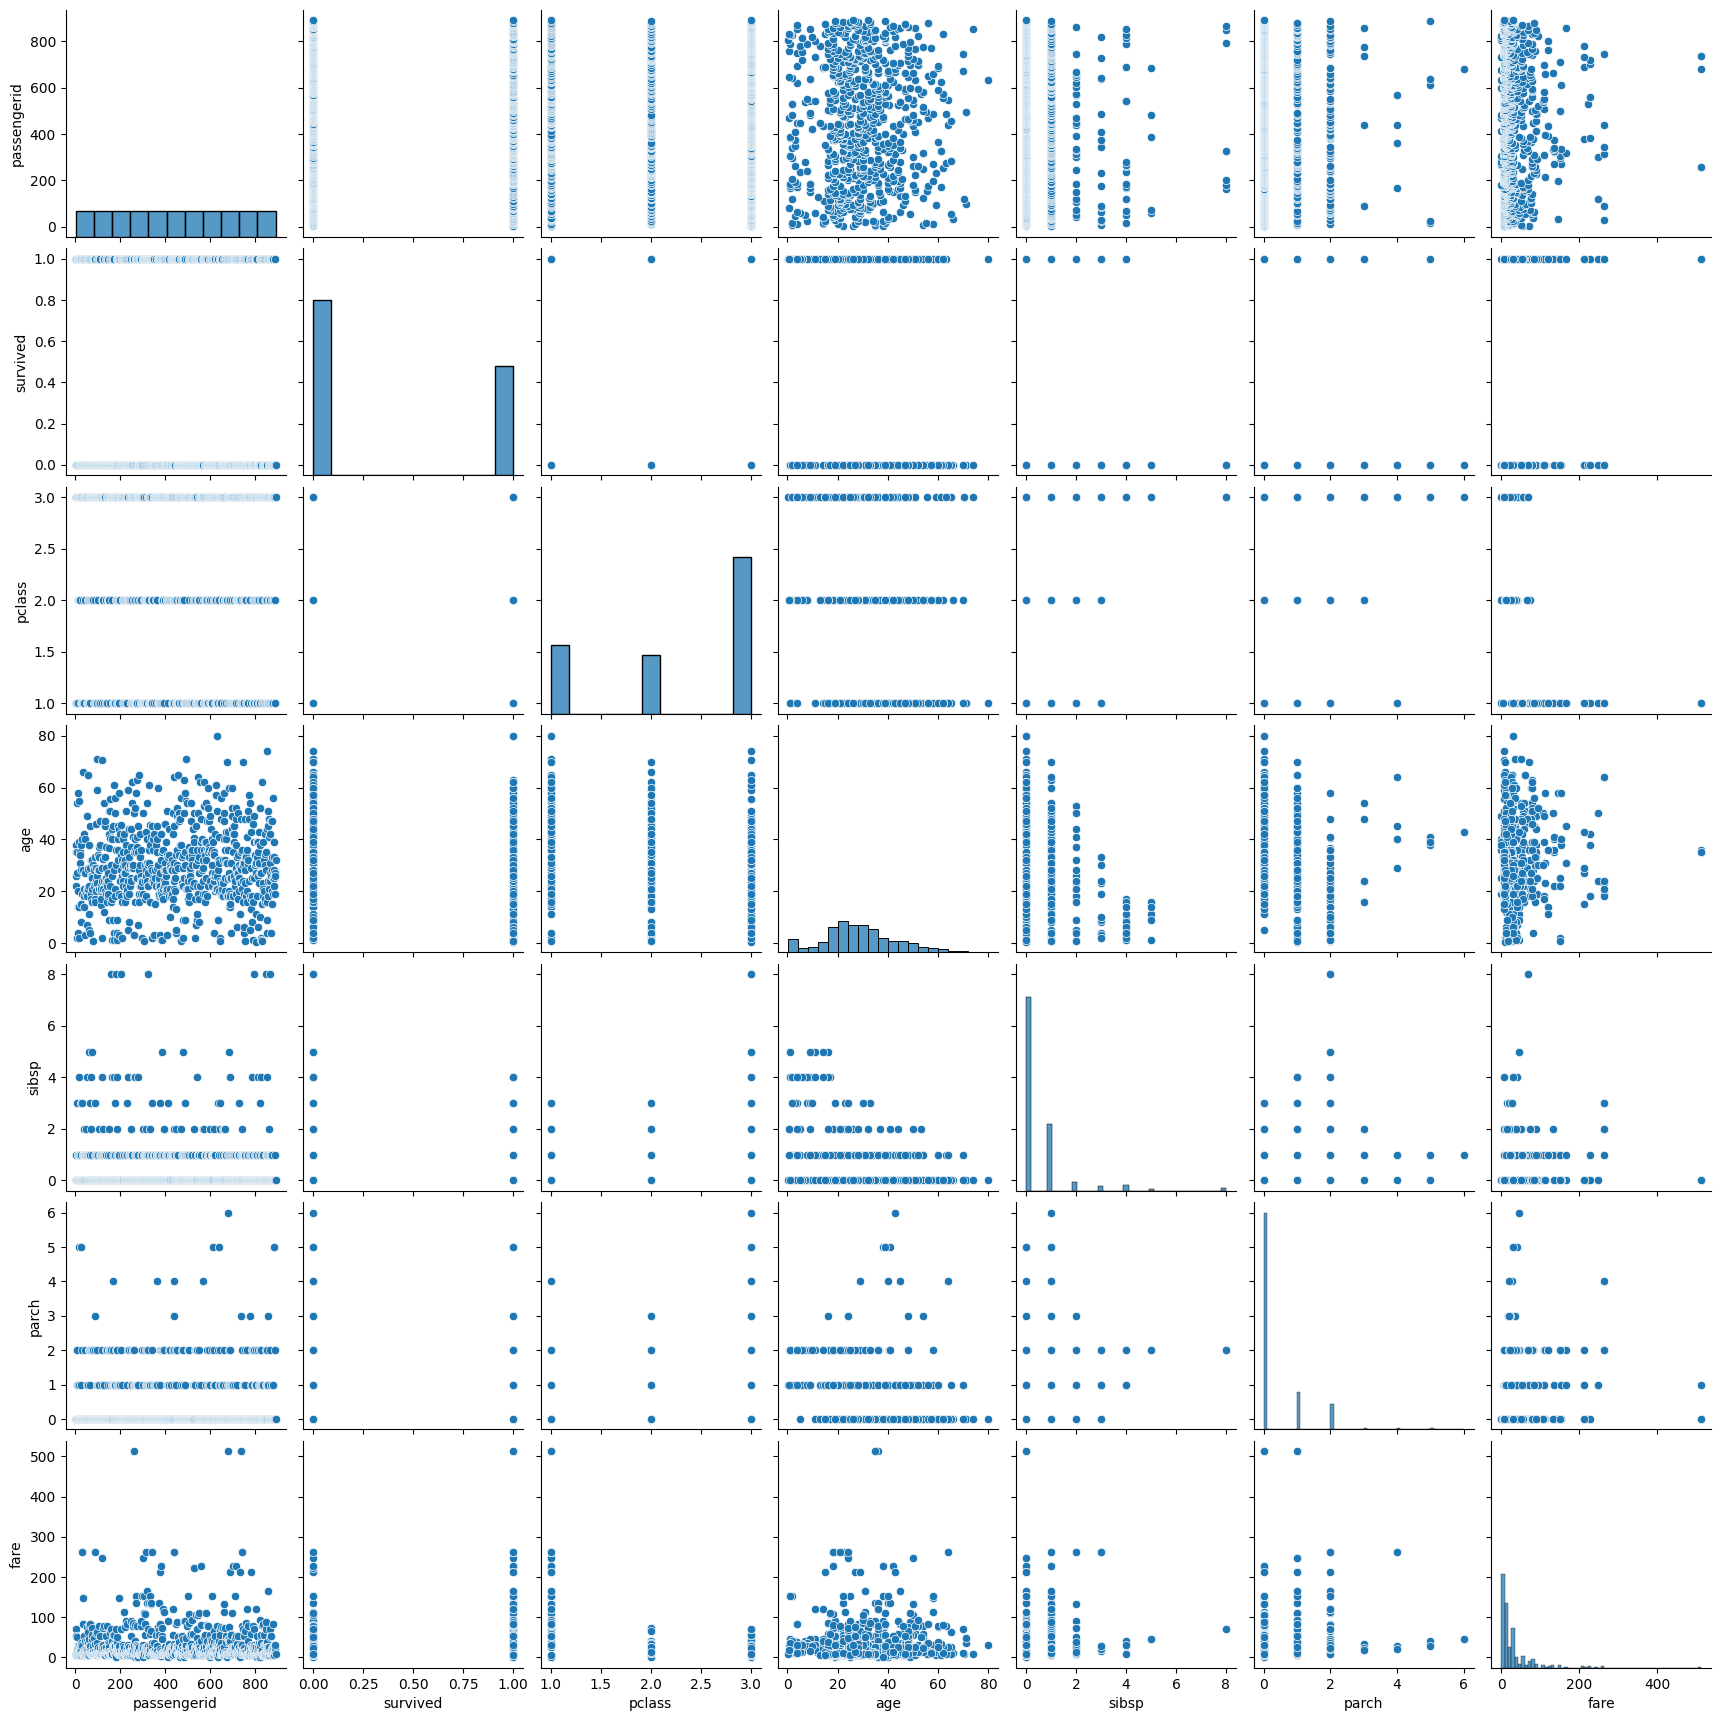

In [20]:
# Visualize all the data using sns.pairplot
sns.pairplot(df)

In [21]:
# Check for null values
df.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

# #2 Select and engineer features.
1. Fill age null values with -999
1. Convert to numerical values if need be by using `pd.get_dummies()`
1. Create a list of the features you are going to use.  In this case use as many or as little as you would like.
1. Define our `X` and `y`
1. Split our data into trainig and testing sets.

In [22]:
# Fill age null values with -999
df['age'] = df['age'].fillna(-999)

In [23]:
# 1. Convert to numerical values if need be by using `pd.get_dummies()`
df = pd.get_dummies(df, columns=['sex', 'pclass', 'embarked'], drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   name         891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   ticket       891 non-null    object 
 7   fare         891 non-null    float64
 8   cabin        204 non-null    object 
 9   sex_male     891 non-null    bool   
 10  pclass_2     891 non-null    bool   
 11  pclass_3     891 non-null    bool   
 12  embarked_Q   891 non-null    bool   
 13  embarked_S   891 non-null    bool   
dtypes: bool(5), float64(2), int64(4), object(3)
memory usage: 67.1+ KB


In [24]:
# 2. Create a list of the features we are going to use.
selected_features = ['fare', 'age', 'sex_male', 'pclass_2', 'pclass_3', 'sibsp', 'parch', 'embarked_Q','embarked_S']

dependent_variable = 'survived'
print([c for c in selected_features if c not in df.columns])

[]


In [25]:
# Define our `X` and `y` and split into train/test
X = df[selected_features]
y = df[dependent_variable]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [26]:
# Split our data into trainig and testing sets.

print('Lenght of our Training data:', X_train.shape, '\nLength of our Testing data:', y_train.shape)

Lenght of our Training data: (712, 9) 
Length of our Testing data: (712,)


# #3 Build and train model.
1. For our first pass, initialize our model with `max_depth=2`.
2. Fit our model with our training data. 
3. Make predictions of our testing data. 
4. Evaluate and print our model scores using accuracy, precision, recall, f1 scores, and auc scores. 
    * To calculate auc score you have to get the predicted probabilites for the Survived class using `model.predict_proba(X_test)[:,1]`
5. Visualize our Decision Tree using provided code. 


In [29]:
# For our first pass, initialize our model with `max_depth=2`.

model = DecisionTreeClassifier(max_depth=2)

In [30]:
# Fit our model with our training data. 
model.fit(X_train,y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [31]:
# Make predictions of our testing data. 
y_pred = model.predict(X_test)


In [32]:
# 4. Evaluate and print our model scores using accuracy, precision, recall, f1 scores, and auc scores. 
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=y_pred)
print('F1 Score: %f' % f1)

# Calculate predicted probabilities
y_pred_proba = model.predict_proba(X_test)

# Keep only the proba for True
y_pred_proba = y_pred_proba[:,1]

# Compute auc score
auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)
print('AUC Score: %f' % auc)

Accuracy Score: 0.776536
Precision Score: 0.939394
Recall Score: 0.449275
F1 Score: 0.607843
AUC Score: 0.813307


# Visualize your tree

# Picking the right parameters...

# Parameter tuning of your Decision Tree using GridSearch or RandomizedSearch

### For assistance on this, look at Steves TA Tips code in `TA-Tips/random_forest_tuning.ipynb`


1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search. 
1. Initalize your GridSearchCV with a DecisionTreeClassifier, your param_grid, and what you are optimizing for.  Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.
1. Fit your GridSearchCV with your training data. 
1. Print the parameters of your best model. 
1. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 
1. Visualize your best tree.
1. Which feature was your most important feature?

```python
tree.DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    presort='deprecated',
    ccp_alpha=0.0,
)
```


[Tips on how to customize / set the paramters in the decision tree.](https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use)

In [34]:
# 1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search.from sklearn.model_selection import GridSearchCV
params = { 'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy', 'log_loss']}

In [35]:
# 1. Initalize your GridSearchCV with a DecisionTreeClassifier, your param_grid, and what you are optimizing for.  Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.
grid_search_cv = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=params,
    scoring='f1',
    cv=5
)

In [37]:
# 1. Fit your GridSearchCV with your training data. 
grid_search_cv.fit(X_train, y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy', ...], 'max_depth': [3, 5, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'f1'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [38]:
# 1. Print the parameters of your best model. 
# Print the best parameters it found
print(grid_search_cv.best_params_)

{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 10}


In [39]:
# 1. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 

# This command gives you the best tree
model = grid_search_cv.best_estimator_

# Now lets evaluate our model
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=y_pred)
print('F1 Score: %f' % f1)

# Calculate predicted probabilities, keep only probability for when class = 1
y_pred_proba = model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)
print('AUC Score: %f' % auc)

Accuracy Score: 0.826816
Precision Score: 0.880000
Recall Score: 0.637681
F1 Score: 0.739496
AUC Score: 0.861924


In [40]:
# 1. Which feature was your most important feature?
# Now lets look at our feature importances
feature_imp = pd.DataFrame.from_dict( {'feature_importance': model.feature_importances_,
                                       'feature':selected_features }).sort_values('feature_importance', ascending=False)
feature_imp

,feature_importance,feature
2,0.469551,sex_male
0,0.174842,fare
1,0.148476,age
4,0.117081,pclass_3
8,0.032730,embarked_S
5,0.031270,sibsp
6,0.026050,parch
3,0.000000,pclass_2
7,0.000000,embarked_Q


# Now onto Random Forests...
Were going to do the same with, but this time with a random forest. Remeber... Repetition is the father of learning.

1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search. 
1. Initalize your GridSearchCV with a RandomForestClassifer, your param_grid, and what you are optimizing for.  Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.
1. Fit your GridSearchCV with your training data. 
1. Print the parameters of your best model. 
1. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 
1. Which feature was your most important feature?


# Parameters of the Random Forest Classifier

```python
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)
```

In [41]:
# 1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search. 
params = {
    'n_estimators': [50, 100, 200], 
    'max_depth': [5, 10, None],
    'max_features': ['sqrt', 'log2', None],
}

In [42]:
# 1. Initalize your GridSearchCV or RandomizedSearchCV with a RandomForestClassifer, your param_grid, and what you are optimizing for.  Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.
grid_search_cv = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=params,
    scoring='f1',
    cv=5
)


In [43]:
# 1. Fit your GridSearchCV with your training data. 
grid_search_cv.fit(X_train, y_train)

,estimator,RandomForestClassifier()
,param_grid,"{'max_depth': [5, 10, ...], 'max_features': ['sqrt', 'log2', ...], 'n_estimators': [50, 100, ...]}"
,scoring,'f1'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [44]:
# 1. Print the parameters of your best model. 
# Print the best parameters it found
print(grid_search_cv.best_params_)




{'max_depth': 10, 'max_features': 'log2', 'n_estimators': 100}


In [45]:
# 1. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 

# This command gives you tree that has the highest f1-score. 
model = grid_search_cv.best_estimator_


# Now lets evaluate our model
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=y_pred)
print('F1 Score: %f' % f1)

# Calculate predicted probabilities, keep only probability for when class = 1
y_pred_proba = model.predict_proba(X_test)[:,1]

auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)
print('AUC Score: %f' % auc)

Accuracy Score: 0.826816
Precision Score: 0.816667
Recall Score: 0.710145
F1 Score: 0.759690
AUC Score: 0.844005


In [46]:
# 1. Which feature was your most important feature?
# Now lets look at our feature importances
feature_imp = pd.Series(model.feature_importances_,index=selected_features).sort_values(ascending=False)
feature_imp

sex_male      0.309317
fare          0.256169
age           0.194579
pclass_3      0.078473
sibsp         0.049490
parch         0.047628
embarked_S    0.029770
pclass_2      0.022937
embarked_Q    0.011638
dtype: float64

# Build a random forest using the ny-vs-sf-housing.csv data. 
* Your target variable, aka the column you are trying to predict, aka your `y` variable is `in_sf`. 
* Can you get an accuracy above %88.8889?
* What was your most important feature?


In [33]:
df = pd.read_csv('data/ny-vs-sf-houses.csv')
df.head()

,in_sf,beds,bath,price,year_built,sqft,price_per_sqft,elevation
0,0,2.0,1.0,999000,1960,1000,999,10
1,0,2.0,2.0,2750000,2006,1418,1939,0
2,0,2.0,2.0,1350000,1900,2150,628,9
3,0,1.0,1.0,629000,1903,500,1258,9
4,0,0.0,1.0,439000,1930,500,878,10


In [48]:
# BUILD, TRAIN, AND EVAULATE A RANDOM FOREST MODEL BELOW. 

y = df['in_sf']
X = df.drop(columns=['in_sf'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'max_features': ['sqrt', 'log2', None],
}

grid_search_cv = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=params,
    scoring='f1',
    cv=5
)

grid_search_cv.fit(X_train, y_train)

print('Best parameters:', grid_search_cv.best_params_)

model = grid_search_cv.best_estimator_
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=y_pred)
print('F1 Score: %f' % f1)

y_pred_proba = model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)
print('AUC Score: %f' % auc)

feature_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_imp)

Best parameters: {'max_depth': None, 'max_features': None, 'n_estimators': 100}
Accuracy Score: 0.888889
Precision Score: 0.877193
Recall Score: 0.925926
F1 Score: 0.900901
AUC Score: 0.950823
elevation         0.484989
price_per_sqft    0.229619
year_built        0.144613
sqft              0.060681
price             0.045278
beds              0.019949
bath              0.014872
dtype: float64


# Awesome difficult extra credit below:
Build a classifier using the adult_income.csv data.  
* The target variable is 'class'
* Start with just using these features `selected_features = ['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week']`
* You have to include the pos_label in your precision, recall, and f1 scores. It just tells the classifier which one is the posotive label.  I provided the proper way below.

* See if you can get above 50% f1 score.  
* See some [super tricks and tips here](https://www.kaggle.com/code/jieyima/income-classification-model)

In [ ]:
df = pd.read_csv('data/adult_income.csv')
df.head()